# Desafío2 - Random Forest



<br>
<div class="alert alert-block alert-success">

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras

<b>Profesor:</b> Rodrigo Abt.

</div>


* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

**Descripción**
* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de **2930 registros** y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable **Sale_Price**.
* A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora **haremos uso de los archivos serializados en la sesión pasada**.

## Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar. Para este ejercicio trabajaremos con un modelo de regresión Random Forest.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

# Importación de librerías clásicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import lec7_graphs as afx
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Importación de funciones y clases de métricas de regresión
from sklearn.metrics import mean_squared_error, median_absolute_error,r2_score
from IPython.display import display, Markdown  
pd.set_option('display.max_columns', None)

In [2]:
# Lectura de archivo
df_original = pd.read_csv('ames_housing.csv')
display(df_original.head())
display(df_original.shape)

,Unnamed: 0,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,1,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,2,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,4,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,5,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


(2930, 82)

In [3]:
# the 'Unamed: 0' column is dropped
df = df_original.copy(deep=True).drop(columns='Unnamed: 0')
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Average,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112,Typical,Typical,CBlock,Typical,Good,Gd,BLQ,2,Unf,0,441,1080,GasA,Fair,Y,SBrkr,1656,0,0,1656,1,0,1,0,3,1,Typical,7,Typ,2,Good,Attchd,Fin,2,528,Typical,Typical,Partial_Pavement,210,62,0,0,0,0,No_Pool,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,North_Ames,Feedr,Norm,OneFam,One_Story,Average,Above_Average,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,CBlock,Typical,Typical,No,Rec,6,LwQ,144,270,882,GasA,Typical,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,Typical,5,Typ,0,No_Fireplace,Attchd,Unf,1,730,Typical,Typical,Paved,140,0,0,0,120,0,No_Pool,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Above_Average,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,406,1329,GasA,Typical,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Good,6,Typ,0,No_Fireplace,Attchd,Unf,1,312,Typical,Typical,Paved,393,36,0,0,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Good,Average,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0,Good,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,1045,2110,GasA,Excellent,Y,SBrkr,2110,0,0,2110,1,0,2,1,3,1,Excellent,8,Typ,2,Typical,Attchd,Fin,2,522,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,OneFam,Two_Story,Average,Average,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,137,928,GasA,Good,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,Typical,6,Typ,1,Typical,Attchd,Fin,2,482,Typical,Typical,Paved,212,34,0,0,0,0,No_Pool,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


## Importación de archivos serializados
* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada, importe el modelo serializado de su compañero y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes. 
* Para importar un archivo serializado, puede ocupar la siguiente línea de código:


```python 
import pickle
read_model = pickle.load(open(NOMBRE_DEL_ARCHIVO,"rb"))
```
    
<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
   
   - Recuerde que para leer los archivos serializados estos deben estar en el mismo directorio de trabajo, en caso contrario deberá ingresar el path (ruta) a ellos.
</div>

In [4]:
# Lectura de mi modelo serializado
filename = 'cristian-contreras-actividad07.sav'
mymodel = pickle.load(open(filename, 'rb'))

# Lectura de mis archivos serializados x_train, y_train, x_test e y_test
X_test_file = 'cristian-contreras-actividad07_X_test.sav'
y_test_file = 'cristian-contreras-actividad07_y_test.sav'
X_test = pickle.load(open(X_test_file, 'rb'))
y_test = pickle.load(open(y_test_file, 'rb'))
y_test = pd.DataFrame(y_test)

display(Markdown('**X_test:**'))
display(X_test.head())
display(X_test.shape)
display(Markdown('**y_test:**'))
display(y_test.head())
display(y_test.shape)

# predicción
y_hat = mymodel.predict(X_test)
y_hat = pd.DataFrame(y_hat, columns=['y_hat'])
display(Markdown('**Vector predicción**:'))
display(y_hat.head())
display(y_hat.shape)

# score por defecto R2
display(Markdown('**Score por defecto (R2):**'))
result = round(mymodel.score(X_test, y_test), 5)
display(result)

**X_test:**

,Year_Built,Gr_Liv_Area,Garage_Cars,Fireplace_Qu_No_Fireplace,Total_Bsmt_SF,Year_Remod_Add,Overall_Qual_Poor,Lot_Area,Bsmt_Qual_Good,Garage_Area
2111,2005,1795,2,1,879,2006,0,9316,1,578
944,2007,1648,2,0,1596,2008,0,3843,0,482
1846,2000,1525,2,0,756,2000,0,2117,1,440
540,2004,1114,0,1,1114,2004,0,13072,1,0
1092,2000,1792,2,0,936,2000,0,10261,1,451


(967, 10)

**y_test:**

,log_Sale_Price
2111,12.160029
944,12.345835
1846,12.083905
540,11.863582
1092,12.136187


(967, 1)

**Vector predicción**:

,y_hat
0,12.341737
1,12.568316
2,12.117269
3,11.924811
4,12.253357


(967, 1)

**Score por defecto (R2):**

0.74476

In [6]:
# Lectura de modelo serializado de mi compañero
filename2 = 'juanjose-uribe-actividad07.sav'
com_model = pickle.load(open(filename2, 'rb'))

# Lectura de mis archivos serializados x_train, y_train, x_test e y_test
X_test_file2 = 'juanjose-uribe-actividad07_Xtest.sav'
y_test_file2 = 'juanjose-uribe-actividad07_ytest.sav'
X_test2 = pickle.load(open(X_test_file2, 'rb'))
y_test2 = pickle.load(open(y_test_file2, 'rb'))
y_test2 = pd.DataFrame(y_test2)

display(Markdown('**X_test2:**'))
display(X_test2.head())
display(X_test2.shape)
display(Markdown('**y_test2:**'))
display(y_test2.head())
display(y_test2.shape)

# predicción
y_hat2 = com_model.predict(X_test2)
y_hat2 = pd.DataFrame(y_hat2, columns=['y_hat2'])
display(Markdown('**Vector predicción**:'))
display(y_hat2.head())
display(y_hat2.shape)

# score2 por defecto R2
display(Markdown('**Score por defecto (R2):**'))
result2 = round(com_model.score(X_test2, y_test2), 5)
display(result2)

**X_test2:**

,Year_Built,Gr_Liv_Area,Garage_Cars,Fireplace_Qu_No_Fireplace,First_Flr_SF,Total_Bsmt_SF,Bsmt_Qual_Good,Year_Remod_Add,Lot_Area,Overall_Qual_Poor
2372,1972,987,1,0,483,483,0,1972,1680,0
2905,1998,1216,2,1,1216,1216,0,1998,4500,0
1388,1966,1228,1,1,1228,1228,0,2006,8544,0
1604,1982,816,1,0,816,816,0,2008,6600,0
2868,1977,1647,2,0,1647,1430,1,1977,12984,0


(967, 10)

**y_test2:**

,log_sale_price
2372,11.456355
2905,12.007622
1388,11.914048
1604,11.779129
2868,12.289954


(967, 1)

**Vector predicción**:

,y_hat2
0,11.711764
1,11.989719
2,11.910095
3,11.711764
4,12.354949


(967, 1)

**Score por defecto (R2):**

0.7461

,Mi Modelo,Modelo Compañero
R2,0.74476,0.74610
RMSE,0.19386,0.20267
MAE,0.09546,0.09584


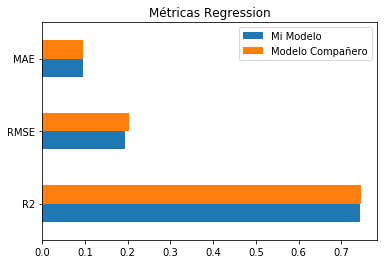

In [7]:
# Comparación de resultados
# Se comparan las métricas de cada modelo
data = {
    'Mi Modelo': [
        r2_score(y_test, y_hat).round(5),
        np.sqrt(mean_squared_error(y_test, y_hat)).round(5),
        median_absolute_error(y_test, y_hat).round(5)
    ],
    'Modelo Compañero': [
        r2_score(y_test2, y_hat2).round(5),
        np.sqrt(mean_squared_error(
            y_test2, y_hat2)).round(5),
        median_absolute_error(y_test2, y_hat2).round(5)
    ]
}
metrics_df = pd.DataFrame(data, index=['R2', 'RMSE', 'MAE'])
display(metrics_df.head())
display(metrics_df.plot(title='Métricas Regression', kind='barh'))

## Evaluación Random Forest
* En base a sus conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Debe utilizar sus datos de entrenamiento/testeo serializados (obtenidos en ejercicio 2). No utilizar train_test_split.
</div>

In [8]:
# Generación y entrenamiento de modelo Random Forest
X_train_file = 'cristian-contreras-actividad07_X_train.sav'
y_train_file = 'cristian-contreras-actividad07_y_train.sav'
X_train = pickle.load(open(X_train_file, 'rb'))
y_train = pickle.load(open(y_train_file, 'rb'))
#y_train = pd.DataFrame(y_train)

rf = RandomForestRegressor(random_state=11238)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=11238,
                      verbose=0, warm_start=False)

In [9]:
# predicción
y_hat_rf = rf.predict(X_test)

,Mi Modelo,Modelo Compañero,Modelo Random Forest
R2,0.74476,0.74610,0.80188
RMSE,0.19386,0.20267,0.17079
MAE,0.09546,0.09584,0.08196


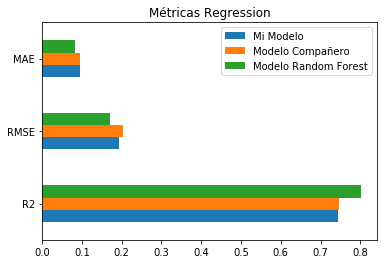

In [10]:
# Reporte de desempeño y comparación con mi modelo anterior
data2 = {
    'Mi Modelo': [
        r2_score(y_test, y_hat).round(5),
        np.sqrt(mean_squared_error(y_test, y_hat)).round(5),
        median_absolute_error(y_test, y_hat).round(5)
    ],
    'Modelo Compañero': [
        r2_score(y_test2, y_hat2).round(5),
        np.sqrt(mean_squared_error(y_test2, y_hat2)).round(5),
        median_absolute_error(y_test2, y_hat2).round(5)
    ],
    'Modelo Random Forest': [
        r2_score(y_test, y_hat_rf).round(5),
        np.sqrt(mean_squared_error(y_test, y_hat_rf)).round(5),
        median_absolute_error(y_test, y_hat_rf).round(5)
    ]
}
metrics_df = pd.DataFrame(data2, index=['R2', 'RMSE', 'MAE'])
display(metrics_df.head())
display(metrics_df.plot(title='Métricas Regression', kind='barh'))

## Reporte las métricas de desempeño
* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
    * max_features : None , log2 , sqrt .
    * n_estimators : Evaluar entre 20 y 1000 en pasos de 50.
* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - n_estimators a evaluar incluye el 20 y excluye el 1000
</div>

In [15]:
# definición de parámetros
n_estimators = range(20, 1000, 50)
max_features = [None, 'log2', 'sqrt']

aux_estimator = []
aux_oob_error = []
aux_feature = []

# se corre modelo para los distintos hiperparámetros y se calcula oob_error
for feature in max_features:b
    for estimator in n_estimators:
        rfr = RandomForestRegressor(
            random_state=11238, 
            max_features=feature, 
            n_estimators=estimator, 
            oob_score=True
        )
        rfr.fit(X_train, y_train)
        aux_estimator.append(estimator)
        aux_oob_error.append(rfr.oob_score_)
        if(feature == None):
            aux_feature.append('None')
        else:
            aux_feature.append(feature)

In [19]:
data3 = {
    'n_Estimators': aux_estimator,
    'OOB_error': aux_oob_error,
    'Feature': aux_feature
}
df_oob = pd.DataFrame(data3)
#df1 = df_oob.loc[df_oob['Feature'] == 'sqrt']
#df2 = df_oob.loc[df_oob['Feature'] == 'log2']
#df3 = df_oob.loc[df_oob['Feature'] == 'None']
#frames = [df1, df2, df3]
#df123 = pd.concat(frames, axis=1, ignore_index=True)
#display(df123.head(100))

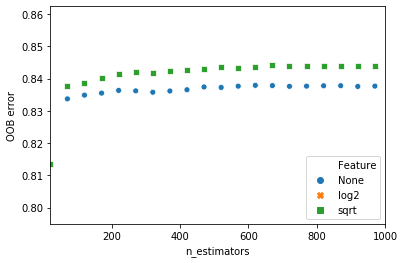

In [20]:
ax = sns.scatterplot(
    x="n_Estimators", y="OOB_error",
    hue="Feature", style="Feature", data=df_oob
)
plt.xlim(20, 1000)
plt.xlabel("n_estimators")
plt.ylabel("OOB error")
plt.legend(loc="lower right")
# plt.show()

**Nota**: log2 y sqrt tienen los mismos valores de OOB_error.

## Refactorice el modelo
* En base a la mejor combinación de hiperparámetros, reentrene el modelo y comente su desempeño.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Debe utilizar sus datos de entrenamiento/testeo serializados (obtenidos en ejercicio 2). No utilizar train_test_split.
</div>

In [21]:
# Reentranamiento modelo refactorizado
rfr_refac = RandomForestRegressor(
    random_state=11238,
    max_features=None,
    n_estimators=20,
    oob_score=True
)
rfr_refac.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=True, random_state=11238,
                      verbose=0, warm_start=False)

In [22]:
y_hat_refac = rfr_refac.predict(X_test)

,Mi Modelo,Modelo Compañero,Modelo Random Forest,Modelo Refactorizado
R2,0.74476,0.74610,0.80188,0.82739
RMSE,0.19386,0.20267,0.17079,0.15942
MAE,0.09546,0.09584,0.08196,0.08371


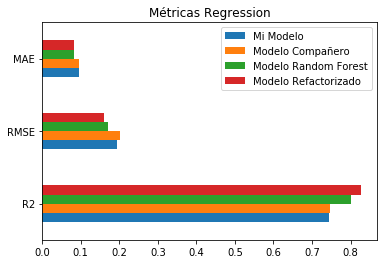

In [23]:
# Reporte de desempeño y comparación con mi modelo anterior
data2 = {
    'Mi Modelo': [
        r2_score(y_test, y_hat).round(5),
        np.sqrt(mean_squared_error(y_test, y_hat)).round(5),
        median_absolute_error(y_test, y_hat).round(5)
    ],
    'Modelo Compañero': [
        r2_score(y_test2, y_hat2).round(5),
        np.sqrt(mean_squared_error(
            y_test2, y_hat2)).round(5),
        median_absolute_error(y_test2, y_hat2).round(5)
    ],
    'Modelo Random Forest': [
        r2_score(y_test, y_hat_rf).round(5),
        np.sqrt(mean_squared_error(
            y_test, y_hat_rf)).round(5),
        median_absolute_error(y_test, y_hat_rf).round(5)
    ],
    'Modelo Refactorizado': [
        r2_score(y_test, y_hat_refac).round(5),
        np.sqrt(mean_squared_error(
            y_test, y_hat_refac)).round(5),
        median_absolute_error(y_test, y_hat_refac).round(5)
    ]
}

metrics_df = pd.DataFrame(data2, index=['R2', 'RMSE', 'MAE'])
display(metrics_df.head())
display(metrics_df.plot(title='Métricas Regression', kind='barh'))

**Comentarios:** El modelo refactorizado tiene mejor R2, y menos RMSE. El MAE aumenta levemente. En general, el modelo refactorizado se comporta mejor que el resto de los modelos.